In [65]:
import sys
import os
import numpy
import matplotlib.pyplot
import chardet
import json
import importlib
import cModel
importlib.reload(cModel)
import runSolver    
importlib.reload(runSolver)
import propagateErrorLN
importlib.reload(propagateErrorLN)
#you should get nixSuite via git clone https://git0.fmf.uni-lj.si/studen/nixSuite.git"
#if you don't put it to $HOME/software/src/, you should update the path"
#load a solution
def downloadKey(key, doDownload=True):
    fh=os.path.expanduser('~')
    setupFileSrc=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
    setup=runSolver.parseSetup(setupFileSrc)
    ref=runSolver.getRunRef(setup,key)
    localDir=os.path.join(fh,'temp',ref)
    setup['localDir']=localDir
    setup['startFromRef']=ref
    if doDownload:
        runSolver.loadSolutionFromRef(setup,True)
    return {'localDir':localDir,'ref':ref,'key':key}

def connectDB(host):
    nixSuite=os.path.join(os.path.expanduser('~'),'software','src','nixSuite')
    sys.path.append(os.path.join(nixSuite,'wrapper'))
    import nixWrapper
    nixWrapper.loadLibrary('labkeyInterface',1)
    import labkeyInterface
    import labkeyDatabaseBrowser
    import labkeyFileBrowser
    importlib.reload(labkeyDatabaseBrowser)
    
    #check connectivity. This checks the configuration in $HOME/.labkey/network.json, 
    #where paths to certificates are stored
    net=labkeyInterface.labkeyInterface()
    fconfig=os.path.join(os.path.expanduser('~'),'.labkey','{}.json'.format(host))
    net.init(fconfig)
    net.getCSRF()
    db=labkeyDatabaseBrowser.labkeyDB(net)
    return db
    
def getWeeklyPortion(x):
    if x==None:
        return 0
    if x==1:
        #never
        return 0
    if x==2:
        #less than 1 /month
        return 6/52.
    if x==3:
        #1-3 per month
        return 2/4.345
    if x==4:
        #once per week
        return 1
    if x==5:
        #twice per week
        return 2
    if x==6:
        #three times per week
        return 3
    if x==7:
        #four times per week
        return 4
    if x==8:
        #five times per week
        return 5
    if x==9:
        #six times per week
        return 6
    if x==10:
        #at least once per day
        return 10.5
    return 0

def getDataScaled(variable,q0):
    db=connectDB('merlin')
    project='PBPK/PHIME'
    schema='study'
    query='data'

    ds=db.selectRows(project,schema,query,[])
    thg=[]
    
    #HG is hair growth in g/week, to match concentration measurement of ng/g
    #normally given as 2g/month,
    #from
    #strand weight: w=0.3 mg /15 cm/6 inch length/strand
    w=0.3e-3/6
    #growth of G=0.5 inch/month
    G=0.5
    #total count of C=0.8-1.2e5 strands on a head
    C=1e5
    #G*w*C
    HG=G*w*C/4.35
    print('HG {} g/week'.format(HG))

    for r in ds['rows']:
        if r[variable]==None:
            continue
        #q is intake [ng/week]
        q=0
        #multiply by grams of average portion
        q=q+getWeeklyPortion(r['freshfish'])*150
        q=q+getWeeklyPortion(r['tinnedfish'])*80
        q=q+getWeeklyPortion(r['frozenfish'])*150
        #ignore weekly uptake below 50g
        if q<50: 
            continue
        #this is intake in ng/week
        q*=q0
        #a mass of 1000 g/week is equivalent to 3M ng/week or 300 ng/min, tested for 48.6 ng/min
        #portion of Hg trapped in hair alpha=cH*HG/q
        thg.append(r[variable]*HG/q)
    return thg
    

remoteSourcesURL https://git0.fmf.uni-lj.si/studen/nixSuite/raw/master/remoteResources/resources.json
{'labkeyInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/labkeyInterface/archive/master.zip', 'branch': 'master', 'modules': []}, 'irAEMM': {'url': 'https://git0.fmf.uni-lj.si/studen/iraemm/archive/master.zip', 'branch': 'master', 'modules': ['iraemmBrowser']}, 'SlicerLabkeyExtension': {'url': 'https://git0.fmf.uni-lj.si/studen/SlicerLabkeyExtension/archive/SlicerExtensionIndex.zip', 'branch': 'SlicerExtensionIndex', 'modules': ['labkeyBrowser']}, 'limfomiPET': {'url': 'https://git0.fmf.uni-lj.si/studen/limfomiPET/archive/master.zip', 'branch': 'master', 'modules': ['imageBrowser']}, 'parseConfig': {'url': 'https://git0.fmf.uni-lj.si/studen/parseConfig/archive/master.zip', 'branch': 'master', 'modules': []}, 'orthancInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/orthancInterface/archive/master.zip', 'branch': 'master', 'modules': []}}
User: andrej studen CSRF: b33922e96ce

(array([ 6., 16., 22., 27., 20., 30., 26., 17., 17., 24., 21., 28., 17.,
        23., 27., 26., 14., 16., 16., 15., 16., 17.,  9., 13.,  6.,  9.,
        12.,  6., 11.,  6.,  8., 12.,  5.,  8.,  4.,  3.,  2.,  4.,  3.,
         2.,  1.,  0.,  3.,  3.,  2.,  2.,  4.,  0.,  1.,  2.,  4.,  4.,
         3.,  1.,  1.,  4.,  3.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.]),
 array([0.        , 0.00164648, 0.00329295, 0.00493943, 0.00658591,
        0.00823239, 0.00987886, 0.01152534, 0.01317182, 0.0148183 ,
        0.01646477, 0.01811125, 0.01975773, 0.02140421, 0.02305068,
        0.02469716, 0.02634364, 0.02799012, 0.02963659, 0.03128307,
        0.03292955, 0.03457603, 0.0362225 , 0.03786898, 0.03951546,
        0.04116194, 0.04280841, 0.04445489, 0.04610137, 0.04774785,
        0.04939432, 0.0510

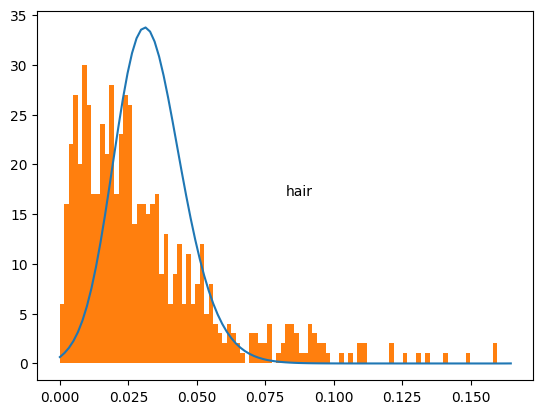

In [71]:
#multiply by average content, EFSA Summary, Tuna fish 3.04 mg/kg or 3040 ng/g
#best fit to the data for q0=100 ng/g of fish, a level of 30 below tunna content, 
#a level of 2 below fish muscle
q0=0.05e3
thg=getDataScaled('H_THg',q0)

#5year data
humanHG=181
humanHGplusI=179

data={}
data['humanHG']=downloadKey(humanHG,0)
data['humanHGplusI']=downloadKey(humanHGplusI,0)
for x in data:
    data[x]['solution']=runSolver.loadSolutionFromDir(data[x]['localDir'],True)
volume='hair'
model=cModel.model()
Q=data['humanHGplusI']['solution']
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=Q['setup']
modelFile=Q['model']
parameterFile=Q['parameters']
print('modelFile: {} {}'.format(modelFile,os.path.isfile(modelFile)))
print('parameterFile: {} {}'.format(parameterFile,os.path.isfile(parameterFile)))

model.parse(modelFile,parameterFile)
pars=model.parSetup['parameters']
lutSE=Q['lutSE']
lut=Q['lut']
y0=Q['sol'][-1][lut[volume]]
dydp=Q['sOut'][-1][lut[volume]]
sigmaAcc=0
cvLN=[]
dydpLN=[]
for p in lutSE:
    par=pars[p]
    try:
        par['dist']
    except KeyError:
        continue
    j=lutSE[p]
    if par['dist']=='normal':
        sigmaAcc+=dydp[j]*dydp[j]
        continue
    cv=par['cv']
    dydpLN.append(dydp[j]/cv)
    cvLN.append(cv)
    print('{:40} {:.2g}/{:.2g}'.format(p,dydp[j],cv))
print('sigmaAcc={}, dydpLN={} cvLN={}'.format(sigmaAcc,dydpLN,cvLN))
fx=numpy.linspace(0,5*y0,101)
cvLN=numpy.array(cvLN)
y=propagateErrorLN.calculateDistribution(fx,y0,numpy.ones(cvLN.shape),cvLN,dydpLN)
#convolve with zero mean gaussian with a sigma=sqrt(sigmaAcc)
fx1=numpy.concatenate((-numpy.flip(fx[1:]),fx))
g=numpy.exp(-0.5*fx1*fx1/sigmaAcc)
y=numpy.concatenate((numpy.zeros((len(fx)-1)),y))
z=numpy.convolve(y,g,'same')
print('{}/{}'.format(len(g),len(y)))
z=z[-len(fx):]

#step=(fx[-1]-fx[0])/(len(fx)-1)
z=z*len(thg)/numpy.sum(z)
matplotlib.pyplot.plot(fx,z)
matplotlib.pyplot.text(0.5*fx[-1],0.5*numpy.max(z),volume)        
#fx=numpy.linspace(0,50,100,endpoint=True)
matplotlib.pyplot.hist(thg,fx)